## This is an analysis of the Medical Cost dataset, by Prabhmeet Singh Deol.

First we will import pandas, and use it to read the dataset.

In [12]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

# This part processes the data without any method chaining.

dataSet = (pd.read_csv('./data/Medical_Cost.csv'))
dataSet = dataSet.loc[:,['bmi','charges']]
dataSet = dataSet.rename(columns={'charges':"Charges_USD"})
dataSet = dataSet.round({'bmi': 2, 'Charges_USD': 1})
#dataSet = dataSet[dataSet['bmi']<40]
## Adding more informative columns to our data Set.
def categorizeBmi(bmiSet):
	bmi = bmiSet['bmi']
	if bmi <18.5:
		return "Underweight"
	elif bmi < 24.9:
		return "Normal"
	elif bmi <29.9:
		return "Overweight"
	elif bmi > 30.0:
		return "Obese"

dataSet['BMI_Category'] = dataSet.apply(categorizeBmi,axis='columns')


## Data Processing using a pipeline.

In [13]:
def process_Medical_Data(dataSet):
	dataSet = (
		pd.read_csv('./../../data/processed/Processed_Medical_Data.csv')
	 	.loc[:,['bmi','charges']]
	 	.rename(columns={'charges':"Charges_USD"})
	 	.round({'bmi': 2, 'Charges_USD': 1})
		)

	dataSet['BMI_Category'] = dataSet.apply(categorizeBmi,axis='columns')

	return dataSet


In [14]:
dataSet = (pd.read_csv('./../../data/processed/Processed_Medical_Data.csv')).loc[:,['bmi','charges']].rename(columns={'charges':"Charges_USD"}).round({'bmi': 2, 'Charges_USD': 1})
#dataSet = dataSet[dataSet['bmi']<40]
## Adding more informative columns to our data Set.
def categorizeBmi(bmiSet):
	bmi = bmiSet['bmi']
	if bmi <18.5:
		return "Underweight"
	elif bmi < 24.9:
		return "Normal"
	elif bmi <29.9:
		return "Overweight"
	elif bmi > 30.0:
		return "Obese"
dataSet['BMI_Category'] = dataSet.apply(categorizeBmi,axis='columns')

In [21]:
## This will give us a short summary statistic of the data.
dataSet.describe().round(2).loc["mean":"max"].T
## This will tell us the (#Rows,#Columns) of the dataset
#dataSet.groupby('BMI_Category').mean().round({'bmi': 2, 'Charges_USD': 1})
#dataSet.head(10)

,mean,std,min,25%,50%,75%,max
bmi,30.66,6.10,15.96,26.3,30.40,34.69,53.13
Charges_USD,13270.42,12110.01,1121.90,4740.3,9382.05,16639.90,63770.40


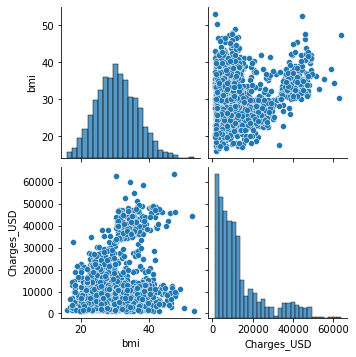

In [16]:
## Exploratory Research
plot1 = sns.pairplot(dataSet,palette="virdis")

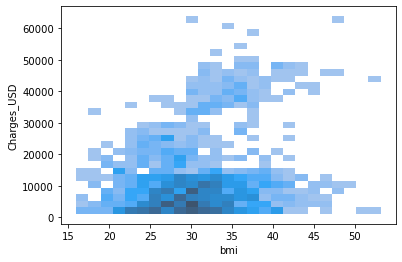

In [17]:
plot2= sns.histplot(
	data = dataSet,
	x="bmi",
	y="Charges_USD",
)

[None,
 Text(0.5, 0, 'BMI Category'),
 Text(0, 0.5, 'Mean Medical Charges in USD'),
 Text(0.5, 1.0, 'BMI Category vs Mean Medical Charges of U.S. Citizens')]

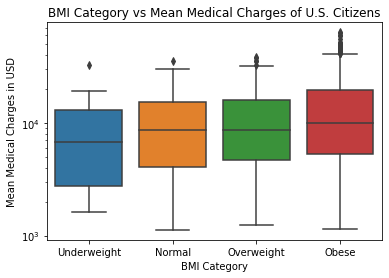

In [18]:
boxplot = sns.boxplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],

)
boxplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="BMI Category vs Mean Medical Charges of U.S. Citizens",
)


[None,
 Text(0.5, 0, 'BMI Category'),
 Text(0, 0.5, 'Mean Medical Charges in USD'),
 Text(0.5, 1.0, 'BMI Category vs Mean Medical Charges of U.S. Citizens')]

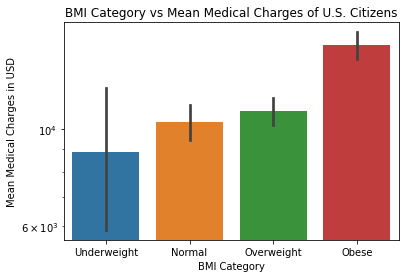

In [19]:
barplot = sns.barplot(
	data = dataSet,
	x="BMI_Category",
	y="Charges_USD",
	order=['Underweight','Normal','Overweight','Obese'],
)
barplot.set(
	yscale="log",
	xlabel="BMI Category",
	ylabel="Mean Medical Charges in USD",
	title="BMI Category vs Mean Medical Charges of U.S. Citizens",
)

[None,
 Text(0.5, 0, 'BMI '),
 Text(0, 0.5, 'Medical Charges in USD'),
 Text(0.5, 1.0, 'BMI vs Medical Charges of U.S. Citizens')]

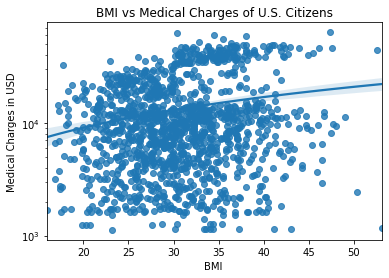

In [20]:
regplot = sns.regplot(
	data = dataSet,
	x="bmi",
	y="Charges_USD",
)
regplot.set(
	yscale="log",
	xlabel="BMI ",
	ylabel="Medical Charges in USD",
	title="BMI vs Medical Charges of U.S. Citizens",
)